# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Annisa Permata Sari
- **Email:** m011d4kx2767@bangkit.academy
- **ID Dicoding:** annisa_permataa

## Menentukan Pertanyaan Bisnis

- Apa Produk yang Terlaris pada Platform E-Commerce Kami?
- Apa Tipe Pembayaran yang Paling Banyak Digunakan?
- Bagaimana Kepuasan Kustomer terhadap platform *E-Commerce* Kami?
- Berapa Perkembangan Penjualan dalam Satu Tahun?

## Import Semua Packages/Library yang Digunakan

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Load Table Customer**

In [84]:
cust_df = pd.read_csv('https://raw.githubusercontent.com/annisaprmts/analysis/master/data/customers_dataset.csv')
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Load Table Order Payments**

In [85]:
order_payment = pd.read_csv('https://raw.githubusercontent.com/annisaprmts/analysis/master/data/order_payments_dataset.csv')
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Load Table Order Items**

In [86]:
order_items = pd.read_csv('https://raw.githubusercontent.com/annisaprmts/analysis/master/data/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Load Table Products**

In [87]:
prod_df = pd.read_csv('https://raw.githubusercontent.com/annisaprmts/analysis/master/data/products_dataset.csv')
prod_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Load Table Orders**

In [88]:
orders_df = pd.read_csv('https://raw.githubusercontent.com/annisaprmts/analysis/master/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Load Table Order Reviews**

In [89]:
order_rev = pd.read_csv('https://raw.githubusercontent.com/annisaprmts/analysis/master/data/order_reviews_dataset.csv')
order_rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

**Menilai Semua Dataframe**

In [90]:
print('\n', cust_df.info())
print('\n', order_payment.info())
print('\n', order_items.info())
print('\n', prod_df.info())
print('\n', orders_df.info())
print('\n', order_rev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 n

**Melihat Missing Value pada Setiap Dataframe**

In [91]:
print('\nBerapa Banyak Missing Value pada DataFrame customers:\n',cust_df.isnull().sum())
print('\nBerapa Banyak Missing Value pada DataFrame order payments:\n', order_payment.isnull().sum())
print('\nBerapa Banyak Missing Value pada DataFrame order items:\n', order_items.isnull().sum())
print('\nBerapa Banyak Missing Value pada DataFrame products:\n', prod_df.isnull().sum())
print('\nBerapa Banyak Missing Value pada DataFrame orders:\n', orders_df.isnull().sum())
print('\nBerapa Banyak Missing Value pada DataFrame order reviews:\n', order_rev.isnull().sum())


Berapa Banyak Missing Value pada DataFrame customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Berapa Banyak Missing Value pada DataFrame order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Berapa Banyak Missing Value pada DataFrame order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Berapa Banyak Missing Value pada DataFrame products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
prod

**Melihat Data Duplikat pada Setiap DataFrame**

In [92]:
print('Berapa Banyak Data Duplikat pada DataFrame customers:',cust_df.duplicated().sum())
print('Berapa Banyak Data Duplikat pada DataFrame order payments:', order_payment.duplicated().sum())
print('Berapa Banyak Data Duplikat pada DataFrame order items:', order_items.duplicated().sum())
print('Berapa Banyak Data Duplikat pada DataFrame products:', prod_df.duplicated().sum())
print('Berapa Banyak Data Duplikat pada DataFrame orders:', orders_df.duplicated().sum())
print('Berapa Banyak Data Duplikat pada DataFrame order reviews:', order_rev.duplicated().sum())

Berapa Banyak Data Duplikat pada DataFrame customers: 0
Berapa Banyak Data Duplikat pada DataFrame order payments: 0
Berapa Banyak Data Duplikat pada DataFrame order items: 0
Berapa Banyak Data Duplikat pada DataFrame products: 0
Berapa Banyak Data Duplikat pada DataFrame orders: 0
Berapa Banyak Data Duplikat pada DataFrame order reviews: 0


**Melihat Ringkasan Parameter Statistik dari Setiap DataFrame**

In [93]:
print('\nRingkasan Parameter Statistik pada DataFrame customers:\n',cust_df.describe(include='all'))
print('\nRingkasan Parameter Statistik pada DataFrame order payments:\n', order_payment.describe(include='all'))
print('\nRingkasan Parameter Statistik pada DataFrame order items:\n', order_items.describe(include='all'))
print('\nRingkasan Parameter Statistik pada DataFrame products:\n', prod_df.describe(include='all'))
print('\nRingkasan Parameter Statistik pada DataFrame orders:\n', orders_df.describe(include='all'))
print('\nRingkasan Parameter Statistik pada DataFrame order reviews:\n', order_rev.describe(include='all'))


Ringkasan Parameter Statistik pada DataFrame customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

     

### Cleaning Data

**Dataframe cust_df**

In [94]:
# Menghapus Kolom yang Kurang Berarti
customers_df = cust_df.drop(columns=["customer_unique_id", "customer_zip_code_prefix"])
customers_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [95]:
# Mengubah Setiap Huruf pada Awal Kata menjadi Kapital
customers_df['customer_city']=customers_df['customer_city'].str.title()
customers_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,Campinas,SP


**Dataframe order_payment**

In [96]:
# Menghapus Kolom yang Kurang Berarti
order_payments = order_payment.drop(columns=["payment_sequential", "payment_installments"])
order_payments.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


In [97]:
# Mengubah Setiap Huruf pada Awal Kata menjadi Kapital dan Mengubah "-" menjadi " "
order_payments['payment_type']=order_payments['payment_type'].str.title()
order_payments['payment_type']=order_payments['payment_type'].str.replace("_"," ")
order_payments.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,Credit Card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,Credit Card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,Credit Card,65.71
3,ba78997921bbcdc1373bb41e913ab953,Credit Card,107.78
4,42fdf880ba16b47b59251dd489d4441a,Credit Card,128.45


**Dataframe order_items**

In [98]:
# Mengubah Tipe Data menjadi Timestamp
order_item = order_items.drop(columns=["shipping_limit_date", "freight_value"])
order_item.head()

,order_id,order_item_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90


**Dataframe prod_df**

In [99]:
# Mengubah Setiap Huruf pada Awal Kata menjadi Kapital
prod_df['product_category_name']=prod_df['product_category_name'].str.title()
prod_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Esporte_Lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Utilidades_Domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [100]:
# Membersihkan Missing Value
prod_df[prod_df.product_category_name.isna()]
prod_df.dropna(axis=0, inplace=True)
prod_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Dataframe orders_df**

In [101]:
# Mengubah Tipe Data
timestamps = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in timestamps:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Dataframe order_rev**

In [102]:
# Mengubah Tipe Data
order_rev['review_answer_timestamp'] = pd.to_datetime(order_rev['review_answer_timestamp'])
order_rev['review_creation_date'] = pd.to_datetime(order_rev['review_creation_date'])
order_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [103]:
# Membersihkan Missing Value
order_rev.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [104]:
order_rev.fillna(value="No Comment", inplace=True)
order_rev.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Exploratory Data Analysis (EDA)

# Explore customers_df

In [105]:
customers_df.describe(include="all")

,customer_id,customer_city,customer_state
count,99441,99441,99441
unique,99441,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,Sao Paulo,SP
freq,1,15540,41746


In [106]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
Sao Paulo         15540
Rio De Janeiro     6882
Belo Horizonte     2773
Brasilia           2131
Curitiba           1521
                  ...  
Ibiara                1
Rio Espera            1
Rio Dos Indios        1
Rio Dos Cedros        1
Lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [107]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

# Explore order_payments

In [108]:
order_payments.describe(include="all")

,order_id,payment_type,payment_value
count,103886,103886,103886.000000
unique,99440,5,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,Credit Card,NaN
freq,29,76795,NaN
mean,NaN,NaN,154.100380
std,NaN,NaN,217.494064
min,NaN,NaN,0.000000
25%,NaN,NaN,56.790000
50%,NaN,NaN,100.000000
75%,NaN,NaN,171.837500


In [109]:
order_payments.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
Credit Card    76505
Boleto         19784
Voucher         3866
Debit Card      1528
Not Defined        3
Name: order_id, dtype: int64

# Explore order_item

In [110]:
order_item.describe(include="all")

,order_id,order_item_id,product_id,seller_id,price
count,112650,112650.000000,112650,112650,112650.000000
unique,98666,NaN,32951,3095,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN
freq,21,NaN,527,2033,NaN
mean,NaN,1.197834,NaN,NaN,120.653739
std,NaN,0.705124,NaN,NaN,183.633928
min,NaN,1.000000,NaN,NaN,0.850000
25%,NaN,1.000000,NaN,NaN,39.900000
50%,NaN,1.000000,NaN,NaN,74.990000
75%,NaN,1.000000,NaN,NaN,134.900000


# Explore prod_df

In [111]:
prod_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,Cama_Mesa_Banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [112]:
prod_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
Cama_Mesa_Banho                  3029
Esporte_Lazer                    2867
Moveis_Decoracao                 2657
Beleza_Saude                     2444
Utilidades_Domesticas            2335
                                 ... 
Casa_Conforto_2                     5
Fashion_Roupa_Infanto_Juvenil       5
Pc_Gamer                            3
Seguros_E_Servicos                  2
Cds_Dvds_Musicais                   1
Name: product_id, Length: 73, dtype: int64

# Explore orders

In [113]:
orders_df.describe(include="all")

<ipython-input-113-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-113-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-113-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-113-903538279252>:1: FutureW

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [114]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

# Explore order_rev

In [115]:
order_rev.describe(include="all")

<ipython-input-115-294c7c61fd72>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_rev.describe(include="all")
<ipython-input-115-294c7c61fd72>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_rev.describe(include="all")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Comment,No Comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [116]:
order_rev.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

In [117]:
order_rev.groupby(by="review_comment_message").order_id.nunique().sort_values(ascending=False)

review_comment_message
No Comment                                           57942
Muito bom                                              230
Bom                                                    189
muito bom                                              121
bom                                                    106
                                                     ...  
Gostei e recomendo ....loja 100% confiavel               1
Gostei e recomendo !!!                                   1
Gostei e recomendo                                       1
Gostei e recomendo                                       1
😡😡😡😡😡👎👎👎👎👎\nEmpresa sem compromisso com o cliente        1
Name: order_id, Length: 36160, dtype: int64

# Merge customers_df dan orders_df

In [118]:
customers_order_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_order_df.head()

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [119]:
customers_order_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,Sao Paulo,15540
1,Rio De Janeiro,6882
2,Belo Horizonte,2773
3,Brasilia,2131
4,Curitiba,1521
5,Campinas,1444
6,Porto Alegre,1379
7,Salvador,1245
8,Guarulhos,1189
9,Sao Bernardo Do Campo,938


# Merge order_payments dan order_rev

In [120]:
payments_rev_df = pd.merge(
    left=order_payments,
    right=order_rev,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_rev_df.head()

,order_id,payment_type,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,Credit Card,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,Credit Card,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Comment,No Comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,Credit Card,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,Credit Card,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Comment,No Comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,Credit Card,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Comment,No Comment,2017-12-21,2017-12-22 01:10:39


In [121]:
payments_rev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,payment_type,order_id
0,Credit Card,76505
1,Boleto,19784
2,Voucher,3866
3,Debit Card,1528
4,Not Defined,3


In [122]:
payments_rev_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,review_score,order_id
0,5.0,57076
1,4.0,19098
2,1.0,11392
3,3.0,8160
4,2.0,3148


In [123]:
payments_rev_df.groupby(by="review_comment_message").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,review_comment_message,order_id
0,No Comment,57942
1,Muito bom,230
2,Bom,189
3,muito bom,121
4,bom,106
5,Recomendo,100
6,Otimo,99
7,otimo,95
8,Ótimo,77
9,Ótimo,74


# Merge prod_df dan order_item_df

In [124]:
prod_order_df = pd.merge(
    left=prod_df,
    right=order_item,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
prod_order_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00
2,96bd76ec8810374ed1b65e291975717f,Esporte_Lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30
4,9dc1a7de274444849c219cff195d0b71,Utilidades_Domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90


In [125]:
prod_order_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name,order_id
0,Cama_Mesa_Banho,9417
1,Beleza_Saude,8836
2,Esporte_Lazer,7720
3,Informatica_Acessorios,6689
4,Moveis_Decoracao,6449
5,Utilidades_Domesticas,5884
6,Relogios_Presentes,5624
7,Telefonia,4199
8,Automotivo,3897
9,Brinquedos,3886


In [126]:
prod_order_df.groupby(by="product_photos_qty").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_photos_qty,order_id
0,1.0,48427
1,2.0,19493
2,3.0,11427
3,4.0,7734
4,5.0,5080
5,6.0,3469
6,7.0,1438
7,8.0,696
8,10.0,324
9,9.0,295


In [127]:
prod_order_df.groupby(by="product_weight_g").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_weight_g,order_id
0,200.0,5912
1,150.0,4710
2,250.0,4105
3,300.0,3798
4,100.0,3129
5,400.0,3019
6,350.0,2844
7,500.0,2428
8,600.0,2328
9,700.0,1783


In [128]:
prod_order_df.groupby(by="product_length_cm").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_length_cm,order_id
0,16.0,15073
1,20.0,9029
2,30.0,6423
3,17.0,5413
4,18.0,5212
5,19.0,4221
6,25.0,4171
7,40.0,3612
8,22.0,3457
9,50.0,2626


In [129]:
prod_order_df.groupby(by="product_height_cm").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_height_cm,order_id
0,10.0,8678
1,20.0,5940
2,15.0,5730
3,11.0,5526
4,12.0,5477
5,2.0,4402
6,4.0,4194
7,8.0,4096
8,16.0,4046
9,5.0,3935


In [130]:
prod_order_df.groupby(by="product_width_cm").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_width_cm,order_id
0,20.0,10574
1,11.0,9005
2,15.0,7725
3,16.0,7501
4,30.0,6518
5,12.0,4863
6,13.0,4760
7,14.0,4116
8,18.0,3596
9,40.0,3422


In [131]:
prod_order_df.groupby(by="product_category_name").agg({
    "product_weight_g": "mean",
    "product_length_cm": "mean",
    "product_height_cm": "mean",
    "product_width_cm": "mean",
})

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name,,,,
Agro_Industria_E_Comercio,3625.113208,28.938679,23.787736,20.867925
Alimentos,658.115686,19.327451,13.666667,15.631373
Alimentos_Bebidas,1104.654676,21.751799,15.924460,16.676259
Artes,1557.545455,49.043062,8.535885,36.531100
Artes_E_Artesanato,1369.875000,30.916667,10.916667,21.541667
...,...,...,...,...
Sinalizacao_E_Seguranca,3886.723618,34.296482,28.693467,21.150754
Tablets_Impressao_Imagem,307.096386,25.506024,9.626506,23.277108
Telefonia,261.622222,18.389439,6.354675,13.399120


# Merge customers_order_df dan payments_rev_df

In [132]:
cust_order_pay_rev_df = pd.merge(
    left=customers_order_df,
    right=payments_rev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
cust_order_pay_rev_df.head()

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,Credit Card,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment,No Comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,Credit Card,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Comment,No Comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Credit Card,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Comment,No Comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,Credit Card,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Comment,No Comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,Credit Card,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [133]:
cust_order_pay_rev_df.groupby(by=["customer_city", "payment_type", "order_status"]).agg({
    "order_id": "nunique",
})

order_id
customer_city       payment_type order_status          
Abadia Dos Dourados Boleto       delivered            1
                    Credit Card  delivered            2
Abadiania           Credit Card  delivered            1
Abaete              Boleto       delivered            4
                    Credit Card  delivered            8
...                                                 ...
Zacarias            Credit Card  delivered            2
Ze Doca             Boleto       delivered            1
                    Credit Card  delivered            3
                    Voucher      delivered            1
Zortea              Credit Card  delivered            2

[8921 rows x 1 columns]

# Merge cust_order_pay_rev dan prod_order_df

In [134]:
all_df = pd.merge(
    left=cust_order_pay_rev_df,
    right=prod_order_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,7c67e1448b00f6e969d365cea6b010ab,124.99
1,18955e83d337fd6b2def6b18a428ac77,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,b8bc237ba3788b23da09c0f1f3a3288c,289.00
2,4e7b3e00288586ebd08712fdd0374a03,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,7c67e1448b00f6e969d365cea6b010ab,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,7c67e1448b00f6e969d365cea6b010ab,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,4a3ca9315b744ce9f8e9374361493884,230.00


In [135]:
all_df.groupby(by=["customer_city", "payment_type", "review_score"]).agg({
    "order_id": "nunique",
})

order_id
customer_city       payment_type review_score          
Abadia Dos Dourados Boleto       5.0                  1
                    Credit Card  5.0                  2
Abadiania           Credit Card  4.0                  1
Abaete              Boleto       1.0                  1
                                 4.0                  1
...                                                 ...
Ze Doca             Credit Card  1.0                  2
                                 3.0                  1
                    Voucher      3.0                  1
Zortea              Credit Card  3.0                  1
                                 5.0                  1

[14933 rows x 1 columns]

# Convert all_df to csv

In [136]:
all_df.to_csv('all_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa Produk yang Terlaris dan Kurang Laris?

In [137]:
sum_products_df = all_df.groupby("product_category_name").product_id.count().sort_values(ascending=False).reset_index()
sum_products_df.head(15)

,product_category_name,product_id
0,Cama_Mesa_Banho,11988
1,Beleza_Saude,10032
2,Esporte_Lazer,9004
3,Moveis_Decoracao,8832
4,Informatica_Acessorios,8150
5,Utilidades_Domesticas,7380
6,Relogios_Presentes,6213
7,Telefonia,4726
8,Ferramentas_Jardim,4590
9,Automotivo,4400


<ipython-input-138-536e5dc93ebf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name", data=sum_products_df.head(5), palette=colors, ax=ax)


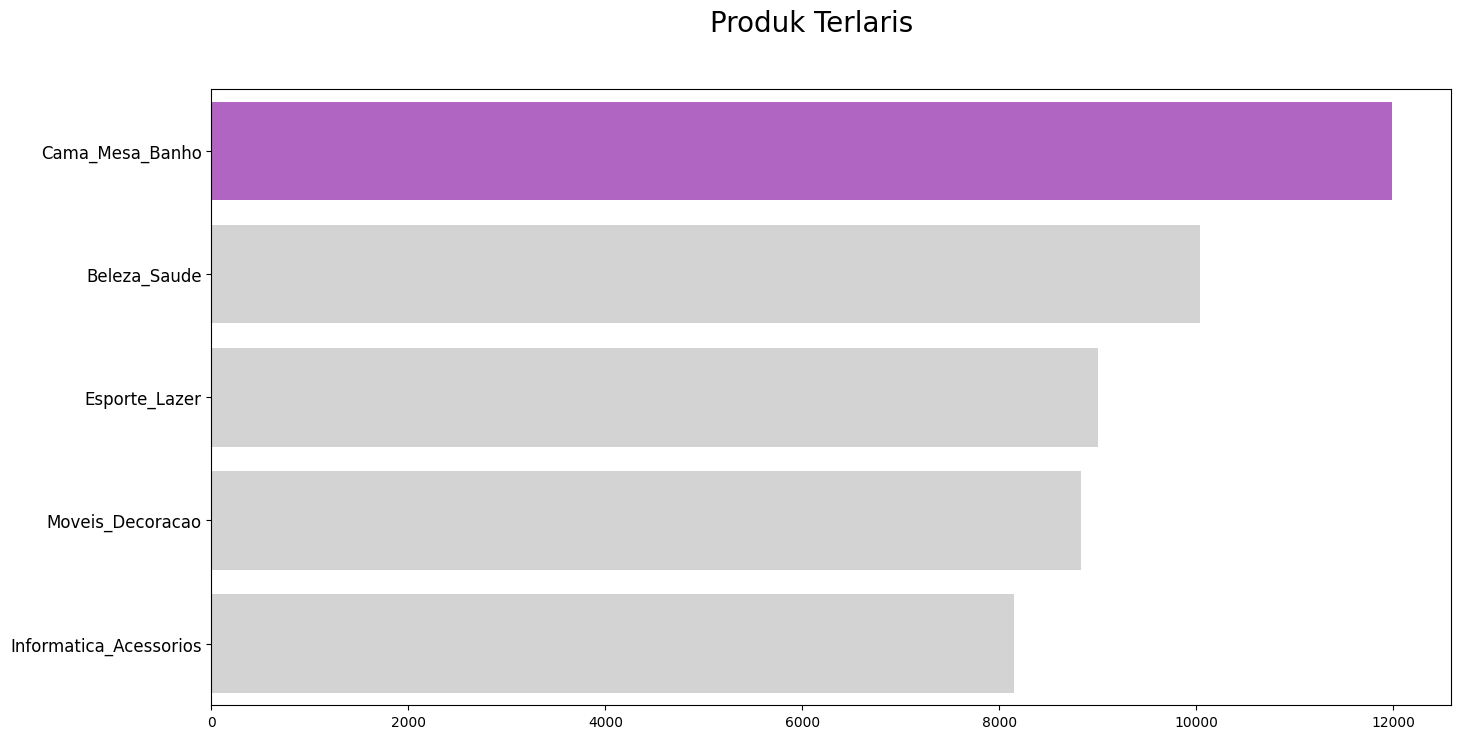

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

colors = ["#BA55D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name", data=sum_products_df.head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis ='y', labelsize=12)

plt.suptitle("Produk Terlaris", fontsize=20)
plt.show()

Pada grafik terlihat bahwa produk terlaris pada platform *e-commerce* kami adalah produk Cama_Mesa_Banho dan diikuti oleh Beleza_Saude, Esporte_Lazer, Moveis_Decoracao, dan Informatica_Acessorios.

### Pertanyaan 2: Apa Tipe Pembayaran yang Paling Banyak Digunakan?

In [139]:
sum_payments_df = all_df.groupby("payment_type").order_id.count().sort_values(ascending=False).reset_index()
sum_payments_df.head(15)

,payment_type,order_id
0,Credit Card,87621
1,Boleto,23135
2,Voucher,6450
3,Debit Card,1704
4,Not Defined,3


<ipython-input-140-72e28c70c75d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


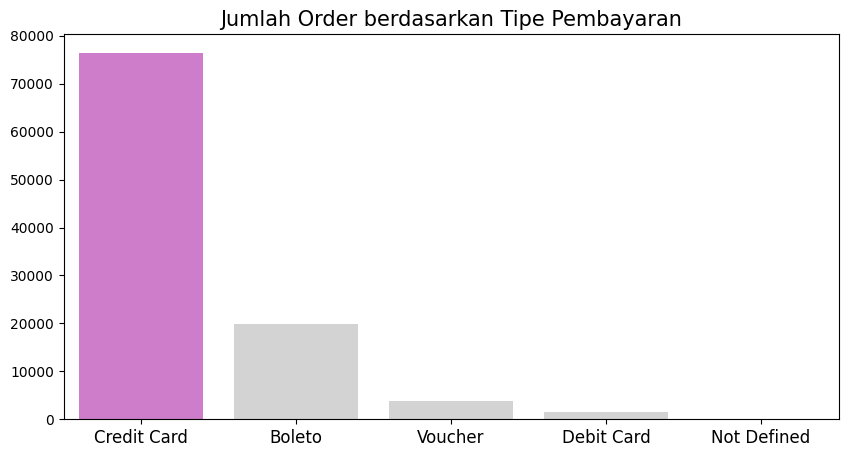

In [140]:
bypayments_df = all_df.groupby(by="payment_type").order_id.nunique().reset_index()
bypayments_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

colors = ["#DA70D6", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="order_count",
    x="payment_type",
    data=bypayments_df.sort_values(by="order_count", ascending=False),
    palette=colors
)
plt.title("Jumlah Order berdasarkan Tipe Pembayaran", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pada grafik di atas terlihat bahwa tipe pembayaran credit card paling banyak digunakan pada platform *e-commerce*.

### Pertanyaan 3: Bagaimana Kepuasan Kustomer terhadap Platform *E-Commerce* Kami?

In [141]:
sum_reviews_df = all_df.groupby("review_score").order_id.count().sort_values(ascending=False).reset_index()
sum_reviews_df.head(15)

,review_score,order_id
0,5.0,66258
1,4.0,22289
2,1.0,15346
3,3.0,9882
4,2.0,4145


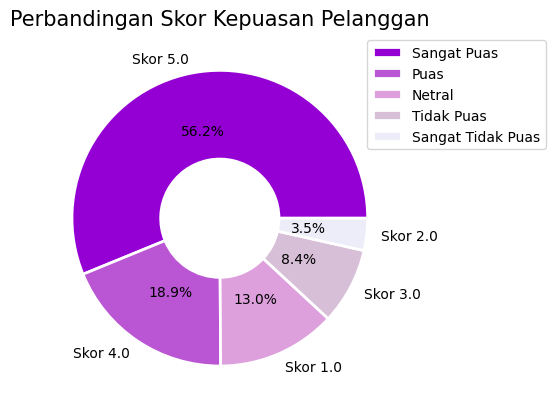

In [142]:
# Membuat kamus yang memetakan nilai skor ke keterangan labelnya
keterangan = {
    5: 'Sangat Tidak Puas',
    4: 'Tidak Puas',
    3: 'Netral',
    2: 'Puas',
    1: 'Sangat Puas'
}

colors = ["#9400D3", "#BA55D3", "#DDA0DD", "#D8BFD8", "#EDEDFA"]

sum_reviews_df['review_score'] = 'Skor ' + sum_reviews_df['review_score'].astype(str)

#Membuat diagram pie
plt.pie(
    x=sum_reviews_df['order_id'],
    labels=sum_reviews_df['review_score'],
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops = {'width': 0.6, 'linewidth' : 2, 'edgecolor' : 'white' }
)
plt.title("Perbandingan Skor Kepuasan Pelanggan", loc="center", fontsize=15)
plt.legend(labels=[keterangan[score] for score in range(1, 6)], loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

Pada grafik di atas terlihat bahwa platform *e-commerce* paling banyak mendapatkan skor 5 dengan perolehan 56.2% dibandingkan skor lainnya.

## Pertanyaan 4: Bagaimana Perkembangan Penjualan dalam Satu Tahun?

In [143]:
month_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
month_df.index = month_df.index.strftime('%B')
month_df = month_df.reset_index()
month_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

month_df.head()

,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [144]:
month_df = month_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
month_df.head()

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176


In [145]:
month_number = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

month_df["month_numeric"] = month_df["order_approved_at"].map(month_number)
month_df = month_df.sort_values("month_numeric")
month_df = month_df.drop("month_numeric", axis=1)

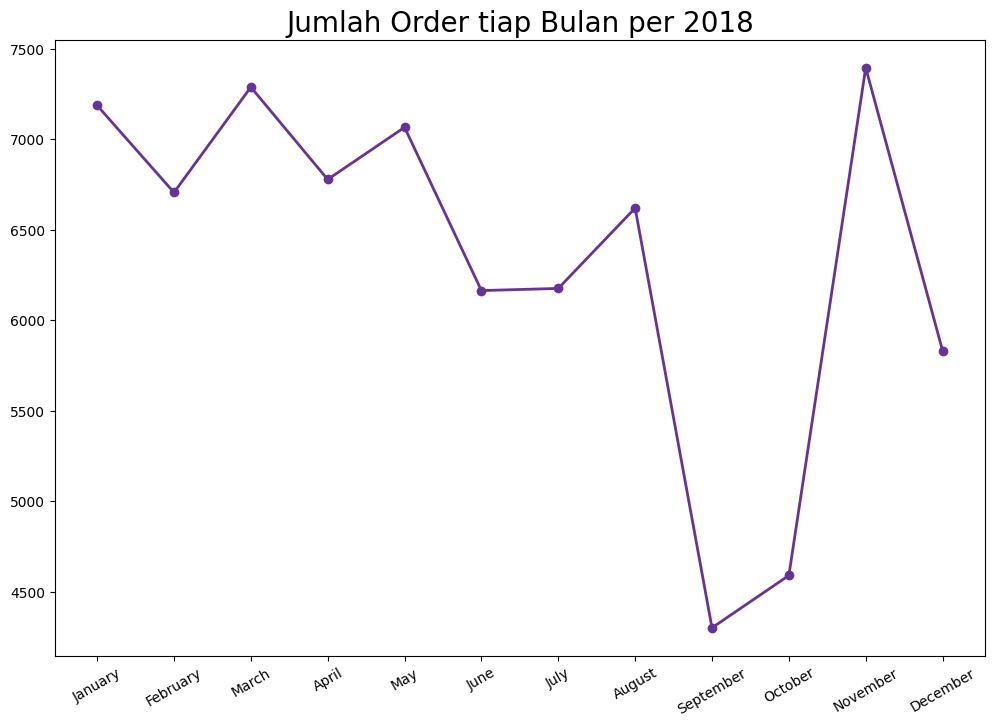

In [146]:
plt.figure(figsize=(12, 8))
plt.plot(
    month_df["order_approved_at"],
    month_df["order_count"],
    marker='o',
    linewidth=2,
    color="#663399"
)
plt.title("Jumlah Order tiap Bulan per 2018", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10)
plt.show()

Pada grafik di atas terlihat bahwa penjualan merosot paling rendah pada bulan September dan penjualan tertinggi adalah pada bulan November.

## Conclusion

- Apa Produk Terlaris pada Platform *E-Commerce* Kami?
> Berdasarkan hasil groupby() dan visualisasi grafik dapat disimpulkan bahwa produk terlaris pada platform *e-commerce* adalah Cama_Mesa_Banho dan diikuti oleh produk Beleza_Saude, Esporte_Lazer, Moveis_Decoracao, dan Informatica_Acessorios.

- Apa Tipe Pembayaran yang Paling Banyak Digunakan?
> Berdasarkan hasil groupby() dan visualisasi grafik dapat disimpulkan bahwa tipe pembayaran yang paling digunakan adalah pembayaran dengan credit card dan diikuti oleh boleto, voucher, dan debit card.

- Bagaimana Kepuasan Kustomer terhadap Platform *E-Commerce* Kami?
> Berdasarkan hasil groupby() dan visualisasi grafik dapat disimpulkan bahwa platform *e-commerce* paling banyak mendapatkan skor 5 dan diikuti oleh skor 4, skor 1, skor 3, skor 3, dan terakhir skor 2.

- Bagaimana Perkembangan Penjualan dalam Satu Tahun?
> Berdasarkan hasil visualisasi grafik dapat disimpulkan bahwa terjadi kenaikan dan penurunan penjualan dari bulan Januari sampai bulan Agustus. Mulai dari bulan Agustus terjadi penurunan yang sangat signifikan sampai bulan September. Mulai dari bulan September terjadi kenaikan penjualan sampai bulan Oktober dan terjadi kenaikan yang sangat signifikan sampai bulan November. Pada bulan Desember terjadi penurunan yang cukup signifikan dari bulan November sebelumnya.

# RFM Analysis

In [147]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


<ipython-input-148-a3e68ed1f496>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax)


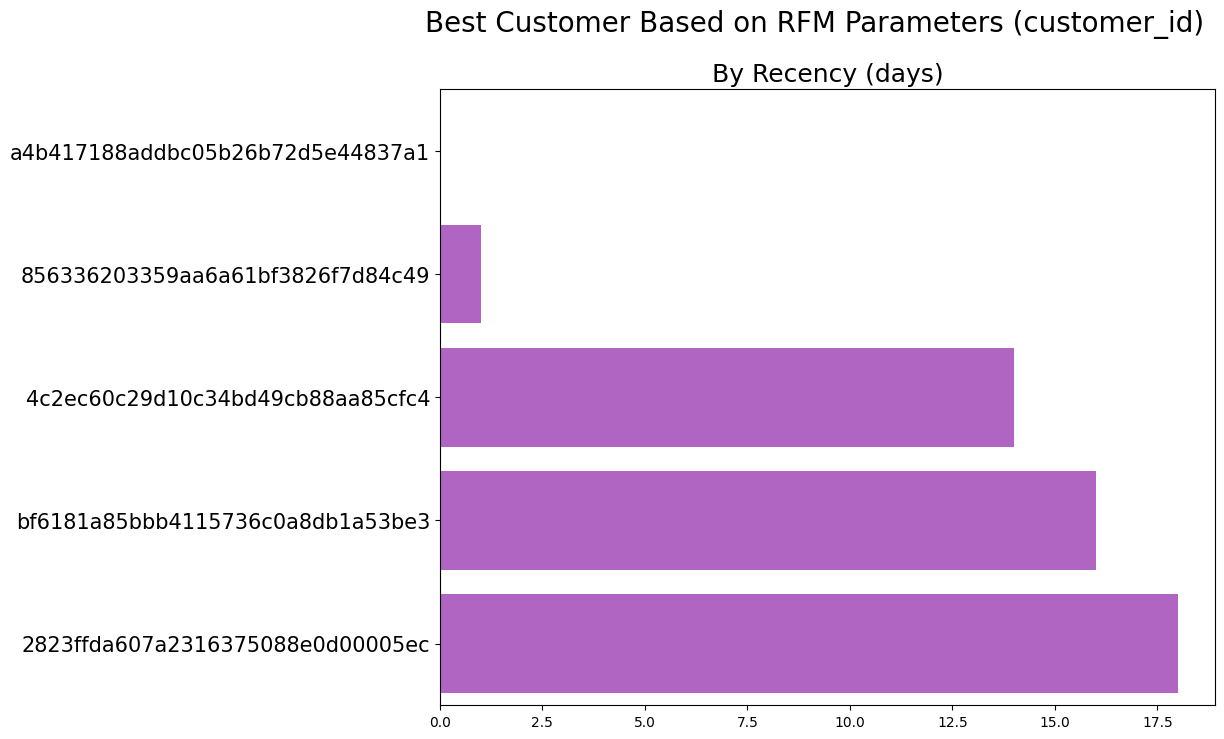

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

colors = ["#BA55D3", "#BA55D3", "#BA55D3", "#BA55D3", "#BA55D3"]

sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Recency (days)", loc="center", fontsize=18)
ax.tick_params(axis ='y', labelsize=15)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

<ipython-input-149-5c48e776b9a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax)


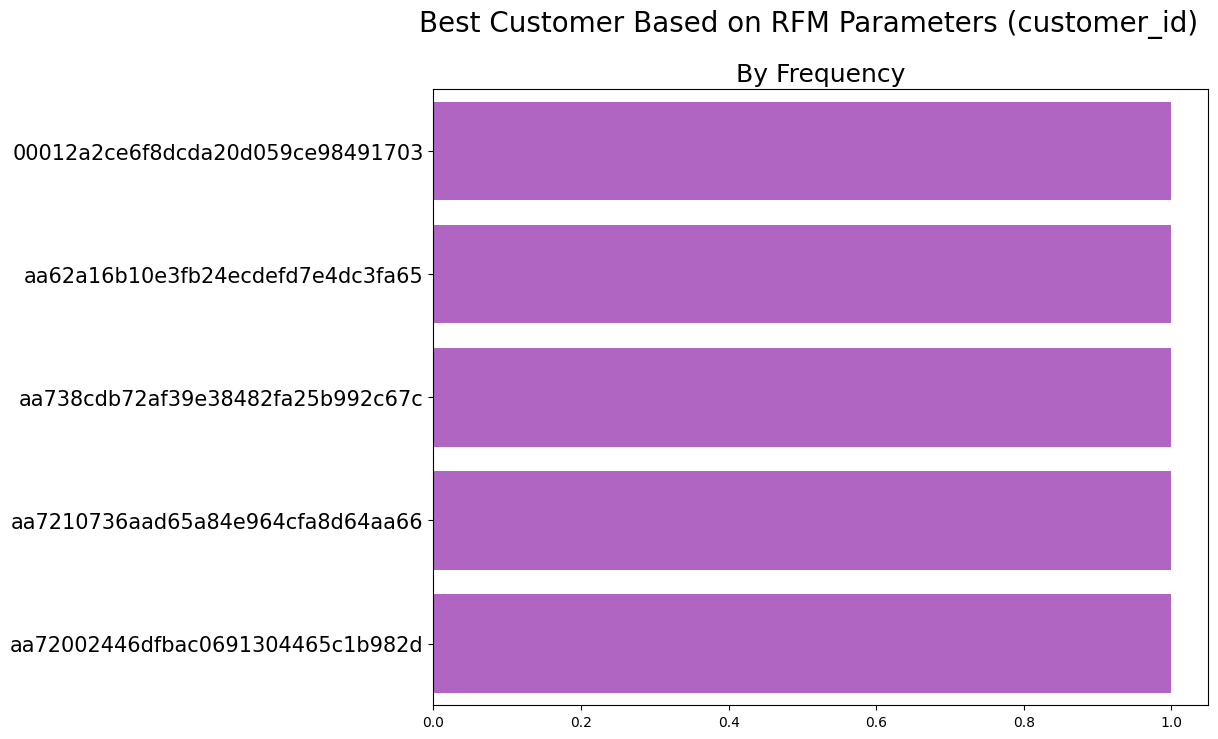

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

colors = ["#BA55D3", "#BA55D3", "#BA55D3", "#BA55D3", "#BA55D3"]

sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Frequency", loc="center", fontsize=18)
ax.tick_params(axis='y', labelsize=15)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

<ipython-input-150-760578581b09>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax)


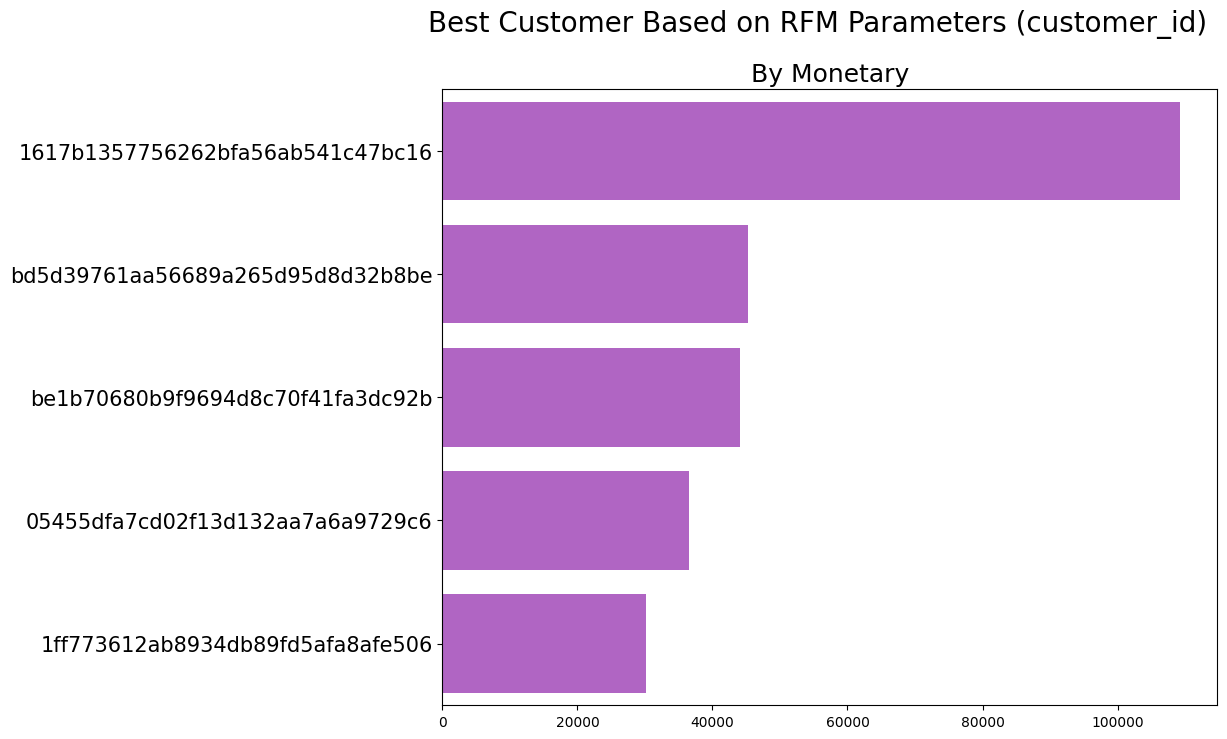

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

colors = ["#BA55D3", "#BA55D3", "#BA55D3", "#BA55D3", "#BA55D3"]

sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Monetary", loc="center", fontsize=18)
ax.tick_params(axis='y', labelsize=15)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

# Interpretasi RFM

- By Recency (days)
> Customer dengan customer_id a4b417188addbc05b26b72d5e44837a1 merupakan customer yang paling terakhir melakukan transaksi.
- By Frequency
> Ternyata setiap customer hanya melakukan satu kali pembelian.
- By Monetary
> Customer dengan customer_id 1617b1357756262bfa56ab541c47bc16 merupakan customer yang paling banyak menghabiskan uang untuk pembelian yaitu lebih dari 10000.
